Nama : Nabilah Sofieyanti

Proyek Kedua : Membuat Model Machine Learning dengan Data Time Series

Belajar Pengembangan Machine Learning

# Import library

In [1]:
#import library
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load dataset

In [2]:
df = pd.read_csv('household_power_consumption.txt', sep=';')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


# Data Preprocessing

## Mengubah tipe data

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    object        
 3   Global_reactive_power  object        
 4   Voltage                object        
 5   Global_intensity       object        
 6   Sub_metering_1         object        
 7   Sub_metering_2         object        
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 142.5+ MB


In [9]:
df['Time'] = pd.to_timedelta(df['Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   Date                   datetime64[ns] 
 1   Time                   timedelta64[ns]
 2   Global_active_power    object         
 3   Global_reactive_power  object         
 4   Voltage                object         
 5   Global_intensity       object         
 6   Sub_metering_1         object         
 7   Sub_metering_2         object         
 8   Sub_metering_3         float64        
dtypes: datetime64[ns](1), float64(1), object(6), timedelta64[ns](1)
memory usage: 142.5+ MB


In [10]:
df['DateTime'] = df['Date'] + df['Time']

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,2006-12-16,0 days 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,2006-12-16,0 days 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,2006-12-16,0 days 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,2006-12-16,0 days 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,2006-12-16,0 days 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,0 days 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075255,2010-11-26,0 days 20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075256,2010-11-26,0 days 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075257,2010-11-26,0 days 21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


## Dataframe yang akan dipakai

In [11]:
df = df[['DateTime', 'Global_intensity']]
df 

,DateTime,Global_intensity
0,2006-12-16 17:24:00,18.400
1,2006-12-16 17:25:00,23.000
2,2006-12-16 17:26:00,23.000
3,2006-12-16 17:27:00,23.000
4,2006-12-16 17:28:00,15.800
...,...,...
2075254,2010-11-26 20:58:00,4.0
2075255,2010-11-26 20:59:00,4.0
2075256,2010-11-26 21:00:00,3.8
2075257,2010-11-26 21:01:00,3.8


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 2 columns):
 #   Column            Dtype         
---  ------            -----         
 0   DateTime          datetime64[ns]
 1   Global_intensity  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 31.7+ MB


In [13]:
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 2 columns):
 #   Column            Dtype         
---  ------            -----         
 0   DateTime          datetime64[ns]
 1   Global_intensity  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.7 MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
#mengecek apakah ada nilai yang hilang dari dataset
df.isnull().sum()

DateTime                0
Global_intensity    25979
dtype: int64

In [15]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 2 columns):
 #   Column            Dtype         
---  ------            -----         
 0   DateTime          datetime64[ns]
 1   Global_intensity  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 46.9 MB


# Plot data

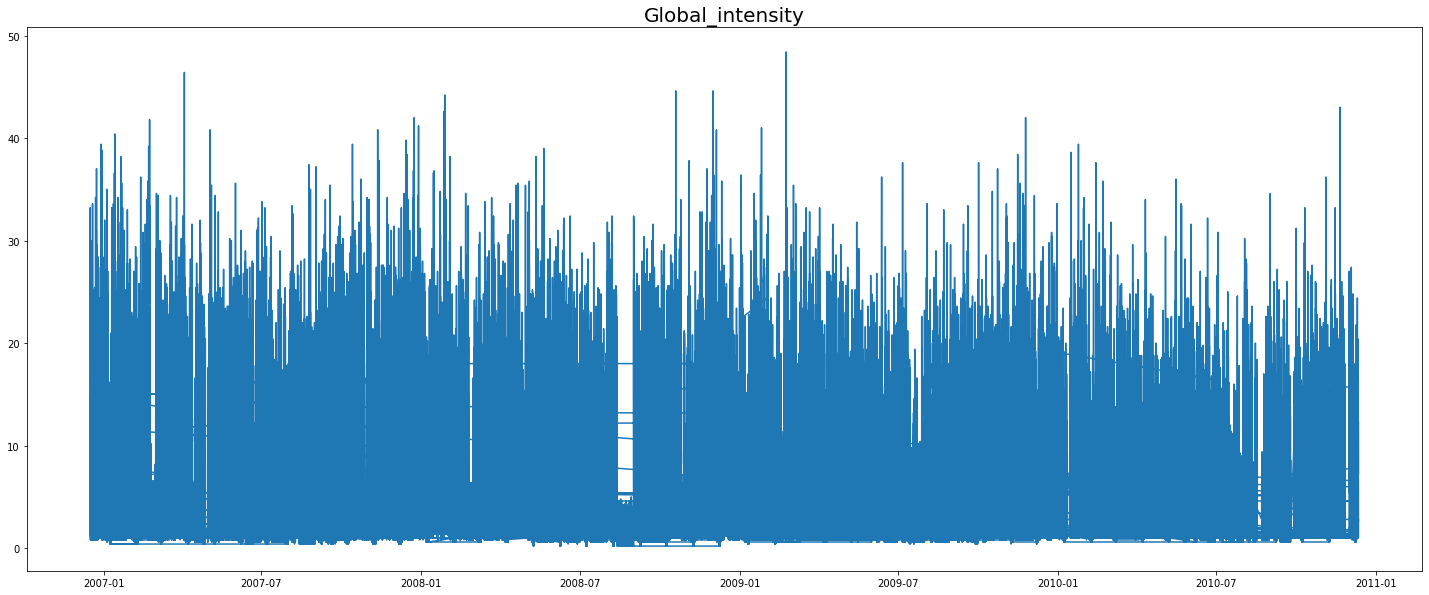

In [30]:
#membuat plot dari data kita dapat menggunakan fungsi plot dari library matplotlib
datetime = df['DateTime'].values
global_intensity  = df['Global_intensity'].values
 
 
plt.figure(figsize=(25,10))
plt.plot(datetime, global_intensity)
plt.title('Global_intensity',
          fontsize=20);

# Mae < 10% skala data

In [21]:
minMae = (df['Global_intensity'].max() - df['Global_intensity'].min()) * 10/100
minMae

4.819999999999999

# Split data

In [23]:
#bagi data untuk data training dan data test
datetime_train, datetime_test, GI_train, GI_test = train_test_split(datetime, global_intensity, test_size=0.2)

In [24]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

# Pengunaan callbacks

In [25]:
#callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<minMae) and (logs.get('val_mae')<minMae):
      print("\nMAE dari model < 10% skala data, stop training!")
      self.model.stop_training = True
callbacks = myCallback()

# Arsitektur model sequential

In [26]:
train_set = windowed_dataset(GI_train, window_size=60, batch_size=100, shuffle_buffer=1000)
val_set = windowed_dataset(GI_test, window_size=60, batch_size=100, shuffle_buffer=1000)

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

# Model compile serta melatih model

In [27]:
#optimizer (dgn parameter learning rate) dan loss
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(), 
              optimizer=optimizer,
              metrics=["mae"]) 
history = model.fit(train_set, validation_data=val_set, epochs=100, callbacks=[callbacks])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
  16394/Unknown - 2040s 124ms/step - loss: 2.7636 - mae: 3.2427
MAE dari model < 10% skala data, stop training!
16394/16394 [==============================] - 2242s 136ms/step - loss: 2.7636 - mae: 3.2427 - val_loss: 2.7506 - val_mae: 3.2290


# Plot akurasi dan loss

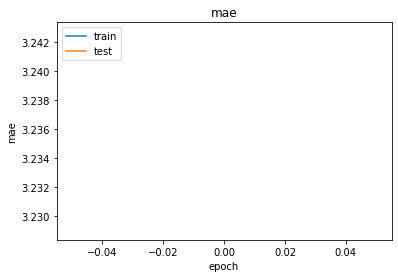

In [28]:
#plot akurasi
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

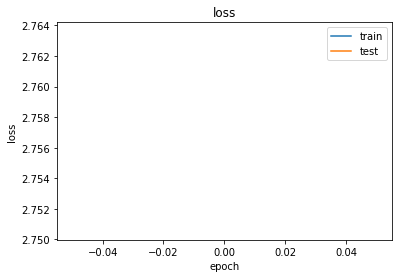

In [29]:
#plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()